# About this Notebook:
- This notebook is being used to produce all the graphs in the paper using the .npys produced into the folder NPYs

In [36]:
import numpy as np
from astropy import constants as c
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
import math as mth
import pandas as pd
from PP import pebble_predictor
import OL18_new
#from allplanets import all_planets

In [37]:
# some useful constants in cgs
year = 365.25*24*3600   #in seconds
au = c.au.cgs.value
MS = c.M_sun.cgs.value      #mass of the sun in cgs
ME = c.M_earth.cgs.value    #mass of the earth in cgs
k_b = c.k_B.cgs.value       #boltzmann const
m_p = c.m_p.cgs.value       #mass of proton
Grav = c.G.cgs.value        #gravitational const
au = c.au.cgs.value     

ZS=0.012                    #metallicity of the sun
RS=6957.e10                #Radius of sun in cm

Nr = 1000 # number of grid points      
rhop = 1.25 # internal density of dust grains 
Rout = 1000.*au
    

In [38]:
df=pd.read_csv("with_errors2.csv"
               ,index_col=False)

df2 = df.drop_duplicates(subset=["Planet Name"], keep='first')
col_names=df2.columns.values.tolist()
for i in col_names:
    df2.dropna(subset=[i], inplace=True)

print(len(df2.index))

862


/var/folders/dr/zf24chrd3j5b19dn9sl_9_gr0000gn/T/ipykernel_32970/90594262.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=[i], inplace=True)
/var/folders/dr/zf24chrd3j5b19dn9sl_9_gr0000gn/T/ipykernel_32970/90594262.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=[i], inplace=True)
/var/folders/dr/zf24chrd3j5b19dn9sl_9_gr0000gn/T/ipykernel_32970/90594262.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [39]:
MStar_list=df2["mass of star (solar masses)"].values.tolist()        #in terms of solar masses
location_array=df2["semi major axis (au)"].values.tolist()           #in terms of au
Rstar_array=df2["radius of star (solar radius)"].values.tolist()
Metallicity=df2["metallicity = log(k)*metallicity of sun"].values.tolist()           #Making a list of all themetallicity values

In [40]:
print(Metallicity[0])
print(MStar_list[0])
print(Rstar_array[0])
print(location_array[0])


-0.17
0.41
0.41
0.01


In [41]:
print(len(location_array)) # total number of planets

862


In [42]:
I=np.load("NPYs/isolp_full.npy") # percentage of planets that reach their isolation mass
print(I)

[[87.00696056 92.45939675 93.387471   93.73549884 93.61948956 93.387471
  93.61948956 93.15545244 93.15545244 92.92343387]
 [24.59396752 74.47795824 86.07888631 91.18329466 91.99535963 92.57540603
  92.80742459 93.03944316 92.69141531 92.34338747]
 [ 0.          2.08816705 20.53364269 43.03944316 59.74477958 72.15777262
  77.7262181  81.9025522  84.57076566 87.12296984]
 [ 0.          0.          0.          0.          0.23201856  1.50812065
   4.06032483  8.58468677 16.93735499 24.24593968]]


In [43]:
isol=I
A=[10**-5,10**-4,10**-3,10**-2]                            #alpha values
V=np.linspace(100,1000,10)            #vfrag values
q=10                                #number of planets being considered from the list

In [44]:
AA,VV = np.meshgrid(A,V)

In [45]:
ALPHA=[]
VFRAG=[]
ISOL=[]

for i in range(len(A)):
    for j in range(len(V)):
            ALPHA.append(A[i])
            VFRAG.append(V[j])
            ISOL.append(isol[i][j])


In [46]:
I=np.load("NPYs/isolp_full.npy")
Final=np.load("NPYs/Final_full.npy")
isol=np.load("NPYs/isol_full.npy")
print(isol)
print(I)


[[750. 797. 805. 808. 807. 805. 807. 803. 803. 801.]
 [212. 642. 742. 786. 793. 798. 800. 802. 799. 796.]
 [  0.  18. 177. 371. 515. 622. 670. 706. 729. 751.]
 [  0.   0.   0.   0.   2.  13.  35.  74. 146. 209.]]
[[87.00696056 92.45939675 93.387471   93.73549884 93.61948956 93.387471
  93.61948956 93.15545244 93.15545244 92.92343387]
 [24.59396752 74.47795824 86.07888631 91.18329466 91.99535963 92.57540603
  92.80742459 93.03944316 92.69141531 92.34338747]
 [ 0.          2.08816705 20.53364269 43.03944316 59.74477958 72.15777262
  77.7262181  81.9025522  84.57076566 87.12296984]
 [ 0.          0.          0.          0.          0.23201856  1.50812065
   4.06032483  8.58468677 16.93735499 24.24593968]]


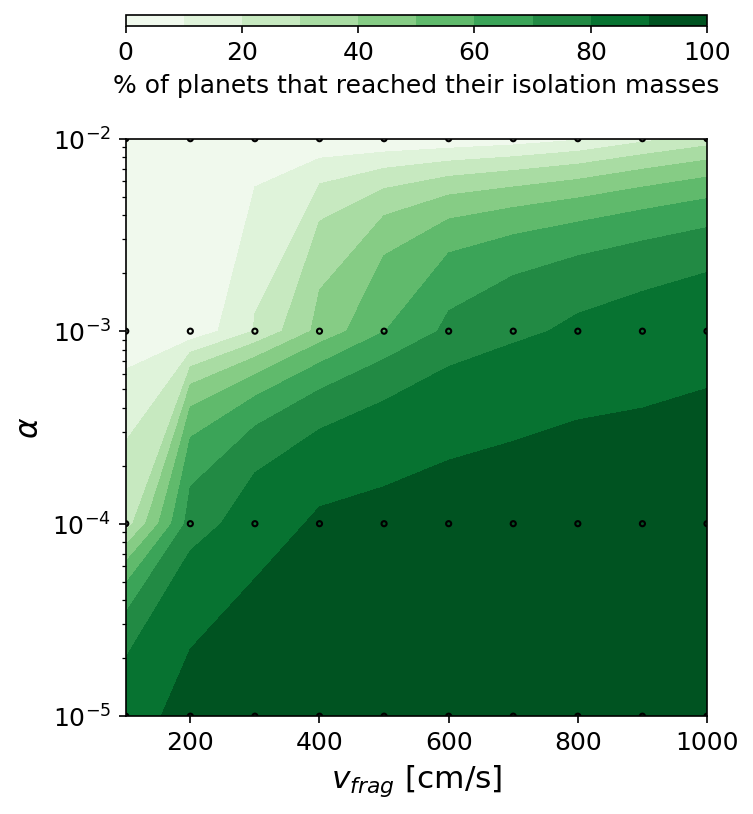

In [47]:
#COLOUR MAP PRINTING
f,ax = plt.subplots(1,1,figsize=(5,5), dpi=150, sharex=True, sharey=True)
plt.rcParams['font.size'] = '12'

#ax.set_aspect('equal')
ax.set_ylabel(r'$\alpha$', fontsize=15)
ax.set_xlim(100,1000)
ax.set_ylim(10**-5,10**-2)
ax.set_yscale('log')
ax.set_xlabel(r'$v_{frag}$ [cm/s]', fontsize=15)
levelsp = np.arange(0,110,10)

cc = ax.contourf(V,A, I, cmap='Greens',levels=levelsp)

pos = ax.get_position()
cax = f.add_axes([pos.x0,pos.y1+.15,pos.width,pos.width/50])
cb = plt.colorbar(mappable=cc, cax=cax, orientation='horizontal',label='% of planets that reached their isolation masses')
#cp = ax.contour(V,A,isol,levels=levelsp,colors='k')
ax.scatter(VFRAG,ALPHA,s=6,facecolors='none', edgecolors='black')
#ax.scatter(VFRAG,ALPHA,c=isol,s=5)
plt.savefig('Graphs/main.jpg', bbox_inches = 'tight')

# About the planets that reach their isolation mass

In [48]:
MStar_list=df2["mass of star (solar masses)"].values.tolist()        #in terms of solar masses
location_array=df2["semi major axis (au)"].values.tolist()           #in terms of au
Rstar_array=df2["radius of star (solar radius)"].values.tolist()
Metallicity=df2["metallicity = log(k)*metallicity of sun"].values.tolist()           #Making a list of all themetallicity values
pl_mass=df2["planet mass (earth mass)"].values.tolist()
pl_rad=df2["planet radius (earth radius)"].values.tolist()
print(len(pl_rad))

862


In [49]:
year = 365.25*24*3600   #in seconds
Nt = 1000   # how many points on the time grid?
endtime = 1.e7*year
timegrid = np.logspace(np.log10(year),np.log10(endtime),Nt)     #starts from 1 year and ends at endtime defined above, goes for Nt number of points

it2 = timegrid.searchsorted((1) * year)     #time at which the core should start accreting pebble
it2

0

In [50]:
datax,datay=np.meshgrid(Metallicity, MStar_list,sparse=True)

print(np.shape(datax),np.shape(datay))
data=np.vstack((datax, datay.T))


(1, 862) (862, 1)


In [51]:
Metallicity_converted=[]
for i in Metallicity:
    Metallicity_converted.append((10**i)*0.012)

print(max(Metallicity_converted))

0.04247968093001217


In [52]:
K=df2.loc[:,"planet mass (earth mass)"].tolist()
c=0
for i in K:
    if i>140 and i<200:
        c+=1
print(c)


74


In [53]:
df3=pd.read_csv("with_errors2.csv"
               ,index_col=False)

# Delete duplicate rows based on specific columns 
df4 = df.drop_duplicates(subset=["Planet Name"], keep='first')

MStar_list=df4["mass of star (solar masses)"].values.tolist()        #in terms of solar masses
location_array=df4["semi major axis (au)"].values.tolist()           #in terms of au
Rstar_array=df4["radius of star (solar radius)"].values.tolist()
Metallicity=df4["metallicity = log(k)*metallicity of sun"].values.tolist()           #Making a list of all themetallicity values



In [54]:
import pandas as pd

df=pd.read_csv("with_errors2.csv"
               ,index_col=False)

# Delete duplicate rows based on specific columns 
df2 = df.drop_duplicates(subset=["Planet Name"], keep='first')
print(len(df2))


935


In [55]:
df=pd.read_csv("with_errors2.csv"
               ,index_col=False)

# Delete duplicate rows based on specific columns 
df2 = df.drop_duplicates(subset=["Planet Name"], keep='first')

MStar_list=df2["mass of star (solar masses)"].values.tolist()        #in terms of solar masses
location_array=df2["semi major axis (au)"].values.tolist()           #in terms of au
Rstar_array=df2["radius of star (solar radius)"].values.tolist()
Metallicity=df2["metallicity = log(k)*metallicity of sun"].values.tolist()           #Making a list of all themetallicity values

In [56]:
I

array([[87.00696056, 92.45939675, 93.387471  , 93.73549884, 93.61948956,
        93.387471  , 93.61948956, 93.15545244, 93.15545244, 92.92343387],
       [24.59396752, 74.47795824, 86.07888631, 91.18329466, 91.99535963,
        92.57540603, 92.80742459, 93.03944316, 92.69141531, 92.34338747],
       [ 0.        ,  2.08816705, 20.53364269, 43.03944316, 59.74477958,
        72.15777262, 77.7262181 , 81.9025522 , 84.57076566, 87.12296984],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.23201856,
         1.50812065,  4.06032483,  8.58468677, 16.93735499, 24.24593968]])

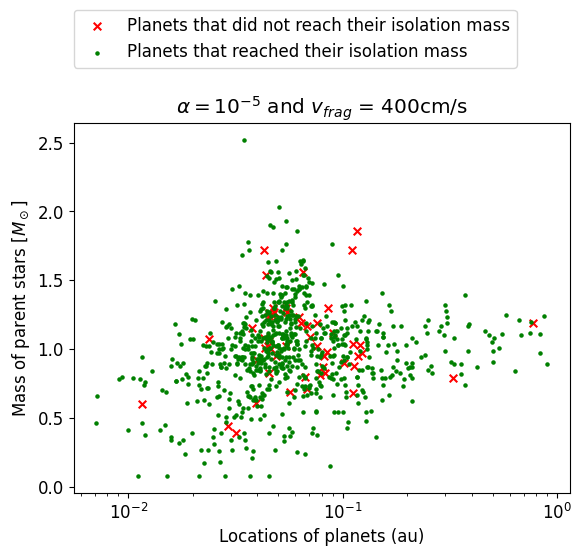

In [57]:
final=np.load("NPYs/Final_full.npy")
pos=[]
pos2=[]

locations=[]
locerr1=[]
locerr2=[]
massofstar=[]
Metallicityofstar=[]
radiusofstar=[]

locations2=[]
massofstar2=[]
Metallicityofstar2=[]
radiusofstar2=[]

lala=final[0][3]
for i in range(798):
    if lala[i]==0:
        pos.append(i)
    elif lala[i]==1:
        pos2.append(i)


for i in pos:
    locations.append(location_array[i])

    massofstar.append(MStar_list[i])
    Metallicityofstar.append(Metallicity[i])
    radiusofstar.append(Rstar_array[i])
    

for i in pos2:
    locations2.append(location_array[i])
    massofstar2.append(MStar_list[i])
    Metallicityofstar2.append(Metallicity[i])
    radiusofstar2.append(Rstar_array[i])

#print(len(pos2))
#print(len(pos))
plt.scatter(locations,massofstar,s=30,color="red",label="Planets that did not reach their isolation mass" , marker='x')
plt.scatter(locations2,massofstar2,s=5,color="green",label="Planets that reached their isolation mass")
#plt.xlim(0,1)
#plt.ylim(0,3)

plt.xlabel("Locations of planets (au)")
plt.ylabel(r"Mass of parent stars [$M_\odot$]")
plt.legend(loc=(0,1.15))
plt.title(r"$\alpha = 10^{-5}$ and $v_{frag}$ = 400cm/s")
plt.xscale("log")
plt.savefig('Graphs/extreme_mstarvsloc.png', bbox_inches = 'tight')


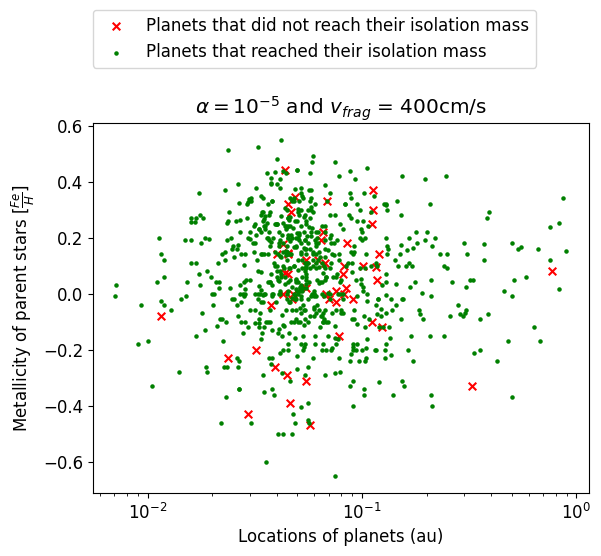

In [58]:
plt.scatter(locations,Metallicityofstar,s=30,color="red",label="Planets that did not reach their isolation mass", marker='x')
plt.scatter(locations2,Metallicityofstar2,s=5,color="green",label="Planets that reached their isolation mass")
#plt.xlim(0,1)
#plt.ylim(0,3)
plt.xlabel("Locations of planets (au)")
plt.ylabel(r"Metallicity of parent stars [$\frac{Fe}{H}$]")
plt.legend(loc=(0,1.15))
plt.title(r"$\alpha = 10^{-5}$ and $v_{frag}$ = 400cm/s")
plt.xscale("log")
plt.savefig('Graphs/ex.png', bbox_inches = 'tight')

Text(0.5, 1.0, '$\\alpha = 10^{-5}$ and $v_{frag}$ = 400cm/s')

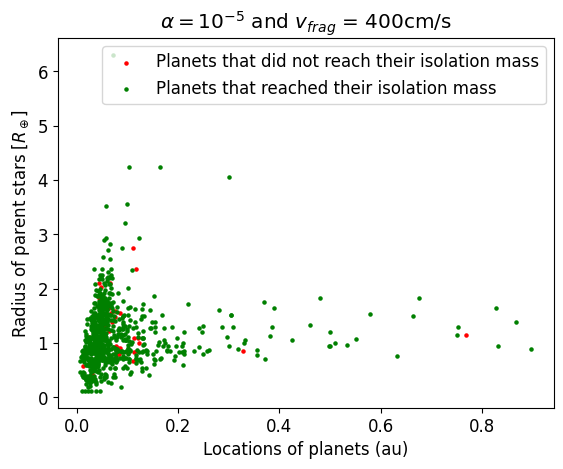

In [59]:
plt.scatter(locations,radiusofstar,s=5,color="red",label="Planets that did not reach their isolation mass")
plt.scatter(locations2,radiusofstar2,s=5,color="green",label="Planets that reached their isolation mass")
#plt.xlim(0,1)
#plt.ylim(0,3)
plt.xlabel("Locations of planets (au)")
plt.ylabel(r"Radius of parent stars [$R_\oplus$]")
plt.legend()
plt.title(r"$\alpha = 10^{-5}$ and $v_{frag}$ = 400cm/s")

Text(0.5, 1.0, '$\\alpha = 10^{-5}$ and $v_{frag}$ = 400cm/s')

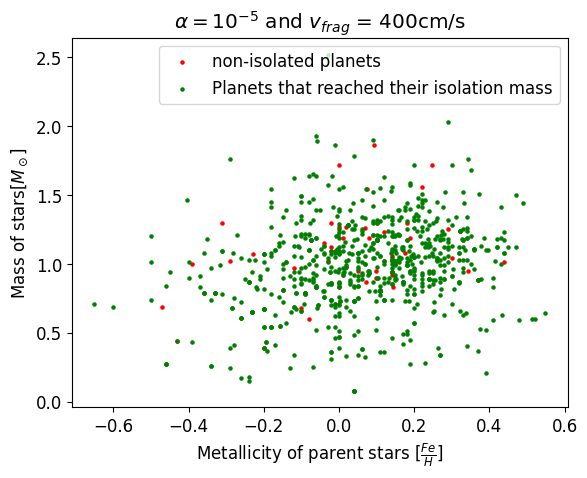

In [60]:
plt.scatter(Metallicityofstar,massofstar,s=5,color="red",label="non-isolated planets")
plt.scatter(Metallicityofstar2,massofstar2,s=5,color="green",label="Planets that reached their isolation mass")
#plt.xlim(0,1)
#plt.ylim(0,3)
plt.xlabel(r"Metallicity of parent stars [$\frac{Fe}{H}$]")
plt.ylabel(r"Mass of stars[$M_\odot$]")
plt.legend()
plt.title(r"$\alpha = 10^{-5}$ and $v_{frag}$ = 400cm/s")

# About the data itself

0.00709 0.898 0.10935166751070424
0.07 7310.05336 707.772616224573


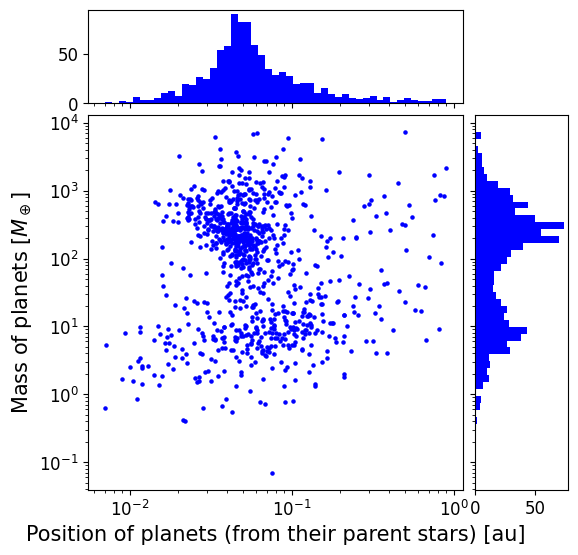

In [61]:
# getting data
x=df2["semi major axis (au)"].values.tolist()
y=df2["planet mass (earth mass)"].values.tolist()

x=np.array(x)
y=np.array(y)

# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0])
ax_histy = fig.add_subplot(gs[1, 1])
# Draw the scatter plot and marginals.
#scatter_hist(x, y, ax, ax_histx, ax_histy)

#ax.errorbar(x, y, yerr=errarr, xerr=errarrx, fmt='None', elinewidth=0.8, color='blue', ls="None")
ax.scatter(x,y, color="blue", s=5)
ax.set_xlabel(r"Position of planets (from their parent stars) [au]", fontsize=15)
ax.set_ylabel(r"Mass of planets [$M_\oplus$]", fontsize=15)
ax.set_yscale("log")
ax.set_xscale("log")
#ax.set_title("Figure 2", x=1.2, y=1.2)

bins1=np.logspace(np.log10(min(x)),np.log10(max(x)),50)
counts1,bins_new=np.histogram(x,bins=bins1)
ax_histx.hist(x, color="blue", label="false", bins=bins_new)
ax_histx.set_xscale("log")
#ax_histx.set_yscale("log")


bins2=np.logspace(np.log10(min(y)),np.log10(max(y)),50)
counts2,bins_new_2=np.histogram(y,bins=bins2)
ax_histy.hist(y,  color="blue", orientation='horizontal',label="false", bins=bins2)
ax_histy.set_yscale("log")
#ax_histy.set_xscale("log")

#ax_histx.axes.get_xaxis().set_visible(False)
#ax_histy.axes.get_yaxis().set_visible(False)
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

print(min(x), max(x), np.std(x))
print(min(y), max(y), np.std(y))
plt.savefig("Graphs/plmassvspos.png", bbox_inches = 'tight')

-0.65 0.549 0.19562079962553136


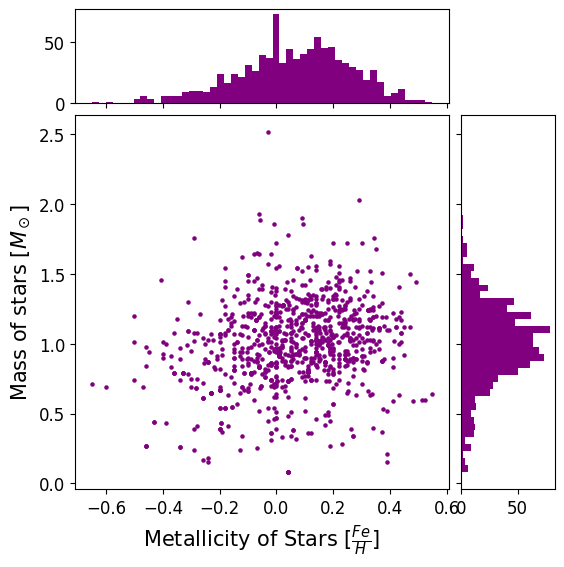

In [62]:
y1=df2["mass of star (solar masses)"].values.tolist()
x1=df2["metallicity = log(k)*metallicity of sun"].values.tolist()

x1=np.array(x1)
y1=np.array(y1)

# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0])
ax_histy = fig.add_subplot(gs[1, 1])
# Draw the scatter plot and marginals.
#scatter_hist(x, y, ax, ax_histx, ax_histy)

#ax.errorbar(x1, y1, yerr=errarr1, xerr=errarrx1, fmt='None', elinewidth=0.5, color='purple', ls="None")
ax.scatter(x1,y1, color="purple", s=5)
ax.set_xlabel(r"Metallicity of Stars $[\frac{Fe}{H}]$", fontsize=15)
ax.set_ylabel(r"Mass of stars [$M_\odot$]", fontsize=15)
#ax.set_title("Figure 1", x=1.2, y=1.2)
#ax.set_yscale("log")
#ax.set_xscale("log")

bins1=np.linspace(min(x1),max(x1),50)
counts1,bins_new=np.histogram(x1,bins=bins1)
ax_histx.hist(x1, color="purple", label="false", bins=bins_new)
#ax_histx.set_xscale("log")
#ax_histx.set_yscale("log")


bins2=np.linspace(min(y1),max(y1),50)
counts2,bins_new_2=np.histogram(y1,bins=bins2)
ax_histy.hist(y1,  color="purple", orientation='horizontal',label="false", bins=bins2)
#ax_histy.set_yscale("log")
#ax_histy.set_xscale("log")

#ax_histx.axes.get_xaxis().set_visible(False)
#ax_histy.axes.get_yaxis().set_visible(False)
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

print(min(x1), max(x1), np.std(x1))
plt.savefig("Graphs/data_starmassvsmetallicity.png", bbox_inches = 'tight')

# Now Plotting the metallicity dependent plots: bargraphs

In [63]:
Metal=np.load("NPYs/Metallicity_full.npy")
isol=np.load("NPYs/isol_full.npy")
Metallicity_normal=[]
for i in range(0,len(Metallicity)):
    Metallicity_normal.append(round(((10**(Metallicity[i]))*ZS),8))

counts2=0
Z_bins=np.linspace(min(Metallicity_normal),max(Metallicity_normal), 10)
counts2,bins2=np.histogram(Metallicity_normal,bins=Z_bins)

In [64]:
'''
plt.rcParams['font.size'] = '12'
#print(isol)

for i in range(0,4):
    for j in range(0,10):
        if isol[i,j] == 0:
            continue
        temp=[]
        temp=Metal[i][j]
        temp=temp[np.nonzero(temp)]
        counts,bins= np.histogram(temp,bins=Z_bins)
        zcents=0.5*(Z_bins[1:]+Z_bins[:-1])
        plt.figure()
        plt.step(zcents,counts*100/counts2)
        plt.ylabel("% of planets that reached"+"\n"+"their isolation mass", fontsize=16)
        plt.xlabel("Metallicity", fontsize=17)
        plt.xlim(0,0.035)
        plt.title(r"$\alpha$ = $10^{"+str((i-5))+"}$;$~V_{frag}$ = "+str(((j+1)*100))+"cm/s", fontsize=17)
        plt.savefig("Graphs/["+str(i+1)+","+str(j+1)+"].png", bbox_inches = 'tight')
'''

'\nplt.rcParams[\'font.size\'] = \'12\'\n#print(isol)\n\nfor i in range(0,4):\n    for j in range(0,10):\n        if isol[i,j] == 0:\n            continue\n        temp=[]\n        temp=Metal[i][j]\n        temp=temp[np.nonzero(temp)]\n        counts,bins= np.histogram(temp,bins=Z_bins)\n        zcents=0.5*(Z_bins[1:]+Z_bins[:-1])\n        plt.figure()\n        plt.step(zcents,counts*100/counts2)\n        plt.ylabel("% of planets that reached"+"\n"+"their isolation mass", fontsize=16)\n        plt.xlabel("Metallicity", fontsize=17)\n        plt.xlim(0,0.035)\n        plt.title(r"$\x07lpha$ = $10^{"+str((i-5))+"}$;$~V_{frag}$ = "+str(((j+1)*100))+"cm/s", fontsize=17)\n        plt.savefig("Graphs/["+str(i+1)+","+str(j+1)+"].png", bbox_inches = \'tight\')\n'

# Plotting the variation of the no. of planets reaching their isolation mass vs. t0

[808. 800. 758. 407.]


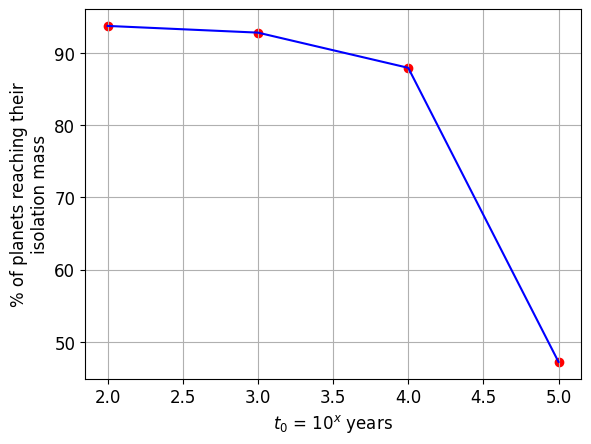

In [65]:
Y = np.load("Model_NPYs/isol_full.npy")
print(Y)
Y = Y.tolist()

for i in range(len(Y)):
    Y[i] = Y[i]/8.62

X = [2, 3, 4, 5]
plt.xlabel(r"$t_0$ = 10$^x$ years")
plt.ylabel("% of planets reaching their"+"\n"+"isolation mass")
plt.grid()
plt.plot(X, Y, color="blue")
plt.scatter(X,Y, color="red")
plt.savefig("Graphs/models.png", bbox_inches = 'tight')


# Plotting the different Core masses and insertion times

In [66]:
isol
862-787

75

In [67]:
T2 = np.load("NPYs/T_2.npy")
core_masses = np.load("NPYs/core_masses.npy")
K=[]
L=[]
for x in T2[0][3]:
    if str(x)=='nan':
        continue
    else:
        K.append(x)

for x in K:
    if x==0:
        continue
    else:
        L.append(x)

#print(K)
np.shape(K)

print(L)
np.shape(L)

[47.89710658061631, 200.12753156878614, 1159.0510380049484, 1387.4694814927516, 825.159478375679, 8694.296603865747, 2016.1967862012286, 1606.1094108689147, 3538.568845397352, 8987.522897057383, 15556.63017222942, 23271.4374953095, 19559.72487594494, 48623.32218384476, 57717.97493949437, 148892.33626136088, 245152.42978167566, 153.32574512615616, 49.925441259990365, 212.6856661763286, 116.70579426961203, 74.60210081638019, 146.8006220677165, 126.86886570780182, 623.4181969176009, 806.2188231930443, 1271.165269980095, 459.47856438948287, 572.9541850030927, 1187.118513968221, 396.9430046867976, 1013.7728016177105, 893.5380907158565, 958.9612215384813, 650.844426443461, 1801.5027594288606, 999.778642909161, 2357.78570367818, 602.7003156441422, 2141.591994855681, 1013.4020447778144, 1042.3184780441652, 961.5457641135176, 782.8214767332682, 787.5192250459976, 794.2362331770281, 1029.7147755958313, 983.7983376194666, 1476.8841416329815, 1160.110615073705, 1204.071826485209, 1763.306996302054

(862,)

In [68]:
T2 = np.load("NPYs/T_2.npy")
core_masses = np.load("NPYs/core_masses.npy")
times=[]
masses=[]

for i in range(len(T2[0,3])):
    if T2[0,3,i] == 'nan':
        T2.remove(T2[0,3,i])

for i in range(len(T2[0,3])):
    if T2[0,3,i] != 0:
        times.append(T2[0,3,i])

for i in range(len(core_masses[0,3])):
    if core_masses[0,3,i] == 0:
        continue
    else:
        masses.append(core_masses[0,3,i])

#print(len(times))
print("For the alpha=10^(-4) and vfrag=4m/s case:")
print("--------times-------")
print("Max. of the planetary core insertion times:" ,np.max(times), "years")
print("Min. of the planetary core insertion times:" ,np.min(times), "years")
print("Std. dev. of the planetary core insertion times:" ,np.std(times), "years")

print("--------masses-------")

#print(len(masses))
print("Max. of the planetary core masses:", np.max(masses), "earth masses")
print("Min. of the planetary core masses:" ,np.min(masses), "earth masses")
print("Std. dev. of the planetary core masses:", np.std(masses), "earth masses")


For the alpha=10^(-4) and vfrag=4m/s case:
--------times-------
Max. of the planetary core insertion times: 4646385.334434344 years
Min. of the planetary core insertion times: 8.091735557826178 years
Std. dev. of the planetary core insertion times: 494399.2378401827 years
--------masses-------
Max. of the planetary core masses: 0.43429495413694347 earth masses
Min. of the planetary core masses: 4.5125086609088986e-05 earth masses
Std. dev. of the planetary core masses: 0.03289493965540633 earth masses


# Plotting the core masses and insertion times for those planets that dont reach their isolation mass

In [74]:
#lets take the alpha=10^(-5) and vfrag=400 case:

core_masses = np.load("NPYs/core_masses.npy")
T_2 = np.load("NPYs/T_2.npy")
locations3 = np.load("NPYs/location_full.npy")

location3 = locations3[0,3]
core_mass = core_masses[0,3] # core masses of this case
times = T_2[0,3] # taking the data set that gave the most number of planets reaching isolation mass - alpha=10^{-5}; vfrag=4m/s

#print(times)

non_isolated_masses=[]
non_isolated_times=[]
non_isolated_locs=[]

sum(Final[0,3]) # is correct
for i in range(len(Final[0,3])):
    if Final[0,3,i]==0: # which means the planet did not reach isolation mass
        non_isolated_masses.append(core_mass[i])
        non_isolated_times.append(times[i])
        non_isolated_locs.append(location3[i])

#print((non_isolated_times))
#print((non_isolated_masses))
#print(len(non_isolated_masses))

print("Max, min and std.dev of times for non-isolated planets [years] (times = value of T2): ", np.max(non_isolated_times), np.min(non_isolated_times), np.std(non_isolated_times))
print("Max, min and std.dev of core masses for non-isolated planets [ME] (masses = mass of planets at T2): ", np.max(non_isolated_masses), np.min(non_isolated_masses), np.std(non_isolated_masses))



Max, min and std.dev of times for non-isolated planets [years] (times = value of T2):  4646385.334434344 231.95342655334983 1508492.9740126815
Max, min and std.dev of core masses for non-isolated planets [ME] (masses = mass of planets at T2):  0.43429495413694347 4.5125086609088986e-05 0.10286028119813079
